In [1]:
# 미션

# 메모리관리는 다양한 방법이 있음. 아래에는 간단하게 모든 변수리스트에서 기본적으로 제공하는 _접두사가 있는 변수만 제외하고 제거하는

# 메모리의 모든 자료를 제거하는 정답은 아님.

all = [var for var in globals() if var[0] != "_"]       # globals()의 목록의 첫글자가 _로 시작하지 않는 자료의 리스트만 가져와서
for var in all:
    del globals()[var]      # _로 시작하지 않는 모든 자료를 삭제함

In [ ]:
# wine의 데이터셋의 이해
# 레드와인
# 화이트와인의 차이점

# alcohol
# sugar
# PH: 산도

# class변수는 y변수, 1이면 white wine, 0이면 red wine

In [8]:
# 자료 불러오기

import pandas as pd
# pd.read_csv('wine1.csv')

from glob import glob
wine1=pd.read_csv(glob('./data/w*.csv')[0], sep='\t')        # w로 시작하는 .csv 파일
wine2=pd.read_csv(glob('./data/w*.csv')[1], sep='\t')

print(wine1.head())

print(wine2.head())

   index  alcohol  class
0   7001     9.90  999.0
1      1     9.40    0.0
2      2     9.80    0.0
3      3     9.99  999.0
4   6498     9.80    0.0
   index  sugar_PH
0   7000   2.3/3.5
1      1  1.9/3.51
2      2   2.6/3.2
3   6498  2.3/3.26
4      4  1.9/3.16


In [ ]:
# 미션

# 두자료의 교집합 자료만 보기 데이콘 경진대회 교재 p216참조
# wine1과 wine2의 index 필드값이 같은 자료만 가져오기
# 최종 wine변수에 할당
# wine['class']의 최대값1, 최소값 0 확인(max, min함수로 출력)

# 새로운 인덱스의 교집합
intersection_idx = list(set(wine1['index']).intersection(wine2['index']))

# 교집합에 존재하는 데이터만 불러오기
wine = wine1.loc[
    wine['index'].apply(lambda x: x in intersection_idx)].copy()

wine = wine.sort_values(by='index').reset_index(drop=True)
wine['class'].min(), wine['class'].max()

print(wine.info())
print(wine.head(20))

In [18]:
# 미션
# wine자료와 wine2자료를 연결하여서
# wine의 index번호에 해당하는
# wine2자료의 sugar_PH값 가져와 df 데이터셋 제작
# df 데이터셋의 sugar_PH의 값 분리하여
# df['sugar'] df['PH']변수로 작성

# merge로 두 데이터 조인
# df=pd.merge(wine, wine1)        # 별도의 wine작업 데이터가 있어야함
df=pd.merge(wine1, wine2)       # 별도의 교집합 작업이 없어도 됨

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 253.8+ KB


In [21]:
# 파이썬 컴프리헨션(압축기법)
df['sugar']=[x.split('/')[0] if pd.notnull(x) else x for x in tmp['sugar_PH']]
df['PH']=[x.split('/')[1] if pd.notnull(x) else x for x in tmp['sugar_PH']]

# df['sugar']=df['sugar_PH'].apply(
#    lambda x: x.split('/')[0] if pd.notnull(x) else x)

#df['PH']=df['sugar_PH'].apply(
#    lambda x: x.split('/')[1] if pd.notnull(x) else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
 4   sugar     6497 non-null   object 
 5   PH        6497 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 355.3+ KB


In [22]:
sugar=[];PH=[]
for x in df['sugar_PH']:
    if pd.notnull(x):
        sugar.append(x.split('/')[0])
        PH.append(x.split('/')[1])

df['sugar']=sugar
df.head()

,index,alcohol,class,sugar_PH,sugar,PH
0,1,9.4,0.0,1.9/3.51,1.9,3.51
1,2,9.8,0.0,2.6/3.2,2.6,3.2
2,6498,9.8,0.0,2.3/3.26,2.3,3.26
3,4,9.8,0.0,1.9/3.16,1.9,3.16
4,5,9.4,0.0,1.9/3.51,1.9,3.51


In [10]:
## 참고
tmp = pd.merge(wine1, wine2)
tmp.info()      # 옵션이 없으면 wine1과 wine2의 필드가 같은걸 자동으로 연결하고 그 index필드가 같은 자료만 가져옴
                # 옵션(조인할 필드, 조인형식: wine1과 같은 wine2자료만 가져오고 그외는 NaN처리, wine2를 기준해서 wine1으로 가져오고 NaN으로 처리)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 253.8+ KB


In [24]:
dfTmp=pd.merge(wine1, wine2)
mainList=[]

for i in dfTmp['sugar_PH']:
    List=[]
    for k in i.split('/'):
        List.append(k)
    mainList.append(List)
print(mainList[:10])

import numpy as np
dfTmp['sugar']=np.array(mainList)[:,0]  # [:,0]모든행, 0번열
dfTmp['PH']=np.array(mainList)[:,1]     # [:,1]모든행, 1번열

[['1.9', '3.51'], ['2.6', '3.2'], ['2.3', '3.26'], ['1.9', '3.16'], ['1.9', '3.51'], ['1.8', '3.51'], ['1.6', '3.3'], ['1.2', '3.39'], ['2', '3.36'], ['6.1', '3.35']]


In [25]:
df=df.drop(['index','sugar_PH'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6493 non-null   float64
 2   sugar    6497 non-null   object 
 3   PH       6497 non-null   object 
dtypes: float64(2), object(2)
memory usage: 253.8+ KB


In [26]:
# 미션

# sugar, PH의 필드형식 float64로 변환

col=['sugar','PH']
for x in col:
    df[x]=df[x].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6493 non-null   float64
 2   sugar    6497 non-null   float64
 3   PH       6497 non-null   float64
dtypes: float64(4)
memory usage: 253.8 KB


In [ ]:
# 또는 col의 속성값이 object인 자료를 찾아서 변경하여 주세요.
for x in df.columns:
    if df[x].dtype=='object':
        df[x]=df[x].astype('float64')

# 위의코드를 컴프리헨션으로 작업 하단에 샘플 코드
# df['sugar']=[x.split('/')[0] if pd.notnull(x) else x for x in tmp['sugar_PH']]

In [29]:
import time
start = time.time()
[df[x].astype('float64') if df[x].dtype=='object' else x for x in df.columns]
# [df[x].astype('float64') for x in df.columns if df[x].dtype=='object']
print(time.time()-start)

0.0


In [ ]:
# 방법 1: 사용자가 변수를 직접 지정하고 일일히 명령어를 작업
df['sugar']=df['sugar'].astype('float64')
df['PH']=df['PH'].astype('float64')

# 방법 2: 공통된 기능을 수행하는 변수명을 모아서 for로 반복함. 또는 사용자젖의 함수 작성해도 됨
col=['sugar','PH']
for x in col:
    df[x]=df[x].astype('float64')
df.info()

# 방법 3: 만약에 object 관련 모든 변수를 숫자로 변형한다면 아래와 같이 작업
for x in df.columns:
    if df[x].dtype=='object':
        df[x]=df[x].astype('float64')

# 방법 4: 방법3을 압축한 형식
[df[x].astype('float64') if df[x].dtype=='object' else x for x in df.columns]
[df[x].astype('float64') for x in columns if df[x].dtype=='object']

# 방법 5: 모두 바꾼다
df.astype('float64')


In [30]:
# class의 결측치를 0으로 치환하고자 함.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# 모든 숫자 변수의 결측치르 0으로 채우기
df[df.select_dtypes(include=numerics).columns]=df[df.select_dtypes(include=numerics).columns].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6497 non-null   float64
 2   sugar    6497 non-null   float64
 3   PH       6497 non-null   float64
dtypes: float64(4)
memory usage: 253.8 KB


In [ ]:
# for로 아래 코드 변경
# sugar=[];PH=[]
# for x in df['class']:
#     if pd.notnull(x):
#         sugar.append(x.split('/')[0])
#         PH.append(x.split('/')[1])

tmp=[]
for x in df['class']:
    if pd.notnull(x):
        tmp.append(0)
    else:
        tmp.append(x)
df['class']=tmp

<AxesSubplot:>

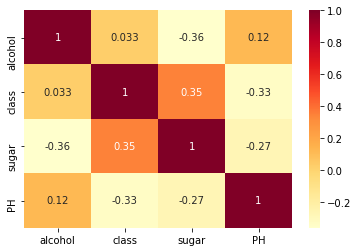

In [31]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

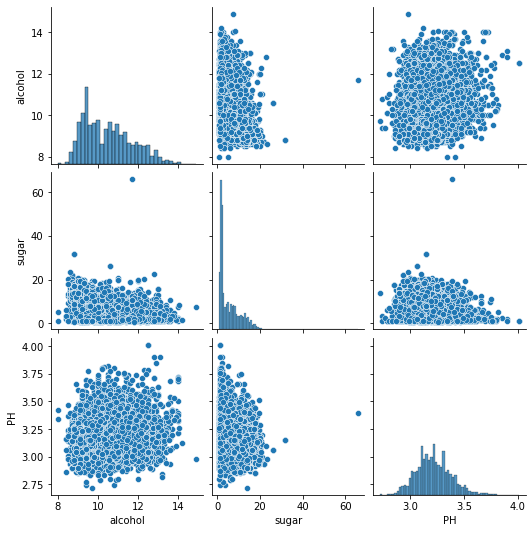

In [32]:
sns.pairplot(df.drop('class', axis=1))

In [34]:
# x, y데이터 분할
# 미션
# y_data
# X_data

y_data=df['class']
X_data=df.drop(['class'], axis=1)
X_data

X_data.head()

,alcohol,sugar,PH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51


In [48]:
# 각자의 컴퓨터마다 값이 다 다름.
# 공통 데이터를 사용하고자 하면 파일로 저장해서 다시 공유
# 파일저장법1: train_x.csv, train_y.csv, test_y.csv, train_y.csv로 4개의 파일로 저장하는 방법
# 파일저장법2: 4개의 자료를 한개의 npz라는 넘파이 압축 파일로 저장하는 방법
train_x

,alcohol,sugar,PH
863,9.7,2.50,3.51
104,9.4,2.20,3.33
1764,9.8,13.00,3.16
1691,12.6,1.70,3.26
1344,11.0,2.60,3.09
...,...,...,...
905,9.5,3.00,3.23
5192,10.7,4.20,3.35
3980,10.2,5.10,3.50
235,9.0,1.90,3.37


In [55]:
# 사이킷런 제공 트레이닝 테스트 자료 분할기 사용
# train_X, test_X, train_y, test_y로 분할 30%

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, precision_score

train_x, test_x, train_y, test_y=train_test_split(X_data, y_data, test_size=0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(4547, 3) (1950, 3) (4547,) (1950,)


In [47]:
# 사이킷런의 StandardScaler

scaler=StandardScaler()
scaler.fit(train_x)

train_scaled=scaler.transform(train_x)
test_scaled=scaler.transform(test_x)

In [43]:
# 미션
# y결과값이 0과 1의 두가지 값만 표시되는 이항분류를 진행하고자 함.
# 로지스특회귀분석 실시
# 트레이닝, 테스트 스코어값

lr=LogisticRegression()
lr.fit(train_scaled, train_y)

print(lr.score(train_scaled, train_y))
print(lr.score(test_scaled, test_y))

0.7864526061139213
0.778974358974359


In [58]:
# 평가지표
# from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve

# 실제 y값과 예측값의 일치유무(y레이븝ㄹ이 2개임ㅁ으로 경우의수는 4개)
# 실제 y값이 1, 예측값도 1 ....... 11, 10, 01, 00
pred=lr.predict(test_scaled)    # pred는 예측값

print('acc 정확도 %2.3f'%accuracy_score(test_y,pred))
print('recall 재현율 %2.3f'%recall_score(test_y,pred))
print('pre 정밀도 %2.3f'%precision_score(test_y,pred))

acc 정확도 0.779
recall 재현율 0.903
pre 정밀도 0.824


In [64]:
# pred-test_y 이값이 0이면 맞음, 아니면 틀림

cnt=0
for i, k in zip(pred, test_y):
    if i==k:
        cnt+=1
print(cnt/len(pred), 1-cnt/len(pred))

# 정확도(성공율): 맞음의갯수/전체갯수

cnt1=0
for x in pred-test_y:
    if x==0:
        cnt1+=1
print(cnt1/len(pred))

#--------------------------------

tmp=[]
for x in pred-test_y:
    tmp.append(x)
print(tmp.count(0)/len(tmp))    # 리스트 자료중에 숫자 0의 count수

#----------------------------------
tmp=[]
tmp=[x for x in pred-test_y]
print(tmp.count(0)/len(tmp))     # 리스트 자료중에 숫자 0의 count수

0.778974358974359 0.22102564102564104
0.778974358974359
0.778974358974359
0.778974358974359


In [ ]:
# 참고, 성공율 확인(TP:실제값1-> 예측값1, TN:실제값0-> 예측값0)
# 참고 score값 확인
# 자료의 class가 1이면 화이트 화인/0이면 레드와인임

# 파이썬 컴프리헨션으로 실제 y값(test_y값)과 예측y값(lr.predict(test_scaled))값과의 차이구함.
# 두값이 같으면 0 즉, 일치하는 자료는 0이고 그외 자료는 불일치 자료임

# train, test자료 모두 해야 함으로 함수로 만들어서 작업


In [81]:
# 참고 예측
# 새로운 new_X가밧도 스케일링 하고 예측해야함
# alcohol, sugar, PH값이

# new_X는 사용자가 웹에서 직접 입력할수도 있고, csv자료일수도있고, 크롤링으로 얻어온 자료일수도 있고
# 또는 이미지 또는 사운드의 내용일수도 있음.

# 이 작업은 보통 위에 있는 작업을 모두 피클링 또는 dump해서 객체화 시켜서 갖고 있게됨.

# 또는 머시니러닝에서도 모델값만 갖고 있게 됨.
# 또는 딥러닝 같은경우는 모델값만 갖고 있게됨


new_XX=np.array([
    [15, 30, 1.08]
])

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(new_X)

newX_scaled=scaler.transform(new_XX)
y_hat=lr.predict(newX_scaled)
print(int(y_hat[0]))

# 이 자료의 class가 1이면 화이트 화인/0이면 레드와인임
classLabel=['red wine', 'white wine']
print(classLabel[int(y_hat[0])])

# classLabel[np.argmax(np.array(y_hat))]

확률=lr.predict_proba(new_XX)    # 출력물이 [0.,1.] 1이 될 확률이 1임. [0.2,0.8]은 1이될 확률이 0.8임
classLabel[np.argmax(확률)]     # [0,1]운 1번째 값이 가장 큼. 즉 가장 큰 값의 index가 나옴

1
white wine


'white wine'

In [86]:
# 미션
# p_value값이 0.05보다 크면 정규분포가 아니라서
# 귀무사설이 맞을음 의미함.
# 즉 그 자료의 분포는 이리정하여서 y값에 영향을 미치지 않음
# p_value값이 0.05보다 작으면 귀무가설을 기각할수 있음을 뜻함

# 관측치 값들의 관여 민감도
# P>│z│ 값의 크기를 확인하여서 x1, x2, x3(넘파이로 변환해서 이렇게 나옴. 판다스형태에서 작업하면 변수)
# x1(alcohol), x2(sugar), x3(PH)값이 모두 특징값으로 참여해도 됨을 확인하는 작업임
# import statsmoodels.api as sm

import statsmodels.api as sm

logitreg=sm.Logit(train_y, train_scaled)
logitreg_fit=logitreg.fit()

results=logitreg_fit.summary()
results



Optimization terminated successfully.
         Current function value: 0.603012
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4544
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Sep 2021   Pseudo R-squ.:                -0.07222
Time:                        14:57:55   Log-Likelihood:                -2741.9
converged:                       True   LL-Null:                       -2557.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3909      0.036     10.961      0.000       0.321       0.461
x2             0.7238      0.040     18.279      0.000       0.646       0.801
x3            -0.5539      0.036    -15.380      0.000      -0.624      -0.483
==============================================================================
"""

In [87]:
# 해석: alcohol값이 1증가할때마다 class가 1이ㅣ 될 확률 이 1.8배 증가함
import numpy as np
np.exp(logitreg_fit.params)

x1    1.478285
x2    2.062197
x3    0.574701
dtype: float64

In [88]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, lr.predict(test_scaled))
cm

array([[ 176,  286],
       [ 145, 1343]], dtype=int64)

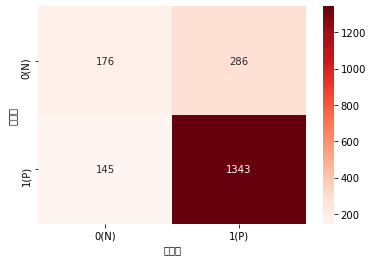

In [92]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.xticks([0.5, 1.5],['0(N)','1(P)'])
plt.yticks([0.5, 1.5],['0(N)','1(P)'])
plt.show()

In [93]:
pd.DataFrame(cm, index=['실제값(N:0)','실제값(P:1)'], columns=['예측값(N:0)','예측값(P:1)'])

,예측값(N:0),예측값(P:1)
실제값(N:0),176,286
실제값(P:1),145,1343


In [94]:
# 참고

tmp=[]
pred=lr.predict(test_scaled)

for i, k in zip(test_y, pred):
    tmp.append(str(int(i))+str(int(k)))

tmpdf=pd.DataFrame({'y':test_y, 'y_hat':pred, '실제값/예측값':tmp})
tmpdf.groupby(['실제값/예측값']).count()

,y,y_hat
실제값/예측값,,
00,176,176
01,286,286
10,145,145
11,1343,1343


In [98]:
# TP: 실제 True인 정답을 True라고 예측(정답)
# FP: 실제 False인 정답을 True라고 예측(오답)
# FN: 실제 True인 정답을 False라고 예측(오답)
# TN: 실제 False인 정답을 False라고 예측(정답)

# bigo는 y_hat
TP=cm[1,1]; TN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]
print(TP,TN,FP,FN)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, lr.predict(test_scaled))
print(cm)

1343 176 286 145
[[ 176  286]
 [ 145 1343]]


In [110]:
# 재현율을 높여봅니다
# predict_proba 분류결정 예측 확률을 반환

pred_proba=lr.predict_proba(test_scaled)
pred=lr.predict(test_scaled)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두개의 class중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba()결과 Shape: (1950, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.00406839 0.99593161]
 [0.09466176 0.90533824]
 [0.04207767 0.95792233]]
두개의 class중에서 더 큰 확률을 클래스 값으로 예측
 [[0.00406839 0.99593161 1.        ]
 [0.09466176 0.90533824 1.        ]
 [0.04207767 0.95792233 1.        ]]


In [115]:
def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))

    # 리포트 출력
    #cm=confusion_matrix(test_y, lr.predict(test_scaled))

In [117]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임계값임
custom_threshold_list=[0.3,0.5,0.8]

for custom_threshold in custom_threshold_list:
    print('------custom_threshold_list%2.1f' % custom_threshold)
    # predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
    pred_proba=lr.predict_proba(test_scaled)
    pred=lr.predict(test_scaled)

    pred_proba_1=pred_proba[:,1].reshape(-1,1)

    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
    custom_predict=binarizer.transform(pred_proba_1)
    custom_predict
    #get_clf_eval(test_y, )

    get_clf_eval(test_y,custom_predict)

------custom_threshold_list0.3
오차행렬
[[  49  413]
 [  40 1448]]
정밀도: 0.7781, 재현율: 0.9731
------custom_threshold_list0.5
오차행렬
[[ 176  286]
 [ 145 1343]]
정밀도: 0.8244, 재현율: 0.9026
------custom_threshold_list0.8
오차행렬
[[410  52]
 [542 946]]
정밀도: 0.9479, 재현율: 0.6358
